# Cross-Validation

La idea de la clase es responder la siguiente pregunta: _¿Qué tan bueno es mi modelo?_

Resulta imposible conocer a priori que modelo explicará de mejor manera un cierto conjunto de datos. Las técnicas de Holdout Set y Cross-Validation permiten estimar el error que posee el modelo.

## Motivación

Los datos Abalone Dataset corresponden a medidas físicas de abulones u orejas marinas (abalones), una especia de lapa o caracol marino comestibles. Este set de datos fue descrito por Sam Waugh para su tesis de doctorado, en la cual utilizó los datos para ilustrar el comportamiento de algoritmos de clasificación. Desde entonces, se ha utilizado para verificar algoritmos de clasificación y regresión.

![abalone](../images/abalone.jpg)

La base de datos contiene mediciones a 4177 abalones, donde las mediciones posibles son sexo ($S$), peso entero $W_1$, peso sin concha $W_2$, peso de visceras $W_3$, peso de concha  $W_4$, largo ($L$), diametro $D$, altura $H$, y el número de anillos $A$. 

Buscaremos **predecir el número de anillos**, utilizando las otras variables.

### Modelos propuestos

Los modelos propuestos son los siguientes:

* __Modelo A__

Consideramos 9 parámetros, llamados $\alpha_i$, para el siguiente modelo:

$$ \log(A) = \alpha_0 +  \alpha_1 W_1 + \alpha_2 W_2 +\alpha_3 W_3 +\alpha_4 W_4 + \alpha_5 S + \alpha_6 \log L + \alpha_7 \log D+  \alpha_8 \log H$$

* __Modelo B__

Consideramos 6 parámetros, llamados $\beta_i$, para el siguiente modelo:

$$ \log(A) = \beta_0 + \beta_1 W_1 + \beta_2 W_2 +\beta_3 W_3 +\beta W_4 + \beta_5 \log( L  D H ) $$

* __Modelo C__

Consideramos 12 parámetros, llamados $\theta_i^{k}$, con $k \in \{M, F, I\}$, para el siguiente modelo:

Si $S=male$:

$$ \log(A) = \theta_0^M + \theta_1^M W_2  + \theta_2^M W_4 + \theta_3^M \log( L  D H ) $$

Si $S=female$

$$ \log(A) = \theta_0^F + \theta_1^F W_2  + \theta_2^F W_4 + \theta_3^F \log( L  D H ) $$

Si $S=undefined$

$$ \log(A) = \theta_0^I + \theta_1^I W_2  + \theta_2^I W_4 + \theta_3^I \log( L  D H ) $$

***¿Cómo podríamos de manera científica saber cuál de los modelos planteados representa de mejor manera al conjunto de datos?***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

from pathlib import Path

alt.themes.enable('opaque')  # Para quienes utilizan temas oscuros en Jupyter Lab
%matplotlib inline

In [2]:
datapath = Path().resolve().parent / "data"

abalone = pd.read_csv(
    datapath / "abalone.data",
    header=None,
    names=["sex", "length", "diameter", "height", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "rings"]
)

abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
alt.Chart(abalone).mark_point(opacity=0.5).encode(
    x="length",
    y="rings",
    color="sex"
).properties(
    width=600,
    height=400,
    title="Cantidad de anillos vs Largo"
)

alt.Chart(...)

<a id='cross_validation'></a>

In [4]:
alt.Chart(abalone).mark_point(opacity=0.5).encode(
    x="length",
    y="diameter",
    color="sex"
).properties(
    width=600,
    height=400,
    title="Diámetro vs Largo"
)

alt.Chart(...)

## Holdout Set

La técnica del holdout set separa los datos en dos grupos.
* El primero de los grupos permitirá entrenar el modelo y obtener los parámetros del modelo.
* El segundo de los grupos se utilizará obtener una estimación del error (predictivo) del modelo.

![holdout](../images/HoldoutSet.png)

__Características__

* Típicamente se separa el 30% de los datos para el testeo del modelo cuando hay una cantidad reducida de registros. Más datos implican que es posible utilizar una relación 75/25, 90/10 o incluso 99/1.
* Esto significa que el modelo se entrena en un conjunto menor de datos, y por tanto el modelo no será tan bueno como si se entrenara en el conjunto completo de datos.
* El modelo se entrena en el conjunto de Training, sin utilizar ningun ejemplo del conjunto de datos Test.
* El evaluar el modelo entrenado en los datos del conjunto de Test, el modelo se está aplicando por primera vez en esos datos, y por tanto, la estimación del error no continene bias.

**Importante**

* El procedimiento estándar es reportar el error entregado en el set de predicción, pero luego volver a entregar el modelo utilizando todos los datos simultáneamente. La partición Training-Test se realiza para tener una estimación del error.
* El error reportado es una estimación conservativa, puesto que al entrenar en todos los datos el error del modelo actual típicamente disminuirá... ¡pero ya no tenemos datos para hacer una mejor estimación!
* Predicciones conservativas son mejores que predicciones optimistas.

### Implementación

La implementación numérica del holdout set no depende del modelo a ajustar: puede realizarse para regresion lineal o logística, modelos discretos, y cualquier otro algoritmos de machine learning, etc.

Los pasos son:
1. Realizar la partición en datos de entrenamiento y de predicción.
2. Obtener los coeficientes del modelo utilizando los datos de entrenamiento.
3. Utilizar el modelo entrenado para realizar predicción de datos en el set de predicción.
4. Comparar la predicción realizada con los datos reales (conocidos en el set de predicción), para estimar el error de predicción.
5. Obtener los coeficientes del modelo todos los datos de entrenamiento.

En general la fórmula del error a calcular viene dado de manera natural por el tipo de problema y modelo utilizado. No siempre es el mismo.

### Ejemplo con datos sintéticos

Ilustraremos el funcionamiento del método con datos sintéticos:

$$ y(x) = 5 \cos \Big( \frac{\pi}{4} x \Big) + \mathcal{N}\Big(0,1\Big)$$

Buscaremos ajustar un modelo del tipo

$$ y(x) = a \cos \Big( b x + c\Big) + d$$

minimizando el error cuadrático.

El error predictivo del modelo será calculado utilizando RMSE (Root Mean Square Error):

$$ E(o,p) = \sqrt{ \frac{1}{N}\sum_{i=1}^N (o_i - p_i)^2 }$$

El RMSE corresponde a la desviación estándar de los residuos.

Prediction error estimated on 1.0607 
The obtained model parameters for training dataset are:
	(a,b,c,d) = (5.659, 0.762, 0.006, -0.329)
The obtained model parameters for the whole dataset are:
	(a,b,c,d) = (5.728, 0.752, 0.014, -0.322)
The true model parameters are:
	(a,b,c,d) = (5.000, 0.785, 0.000, 0.000)

Conservative error estimation on testing dataset: 1.06
Pure random error on testing dataset: 1.11
Pure random error on all data: 1.04


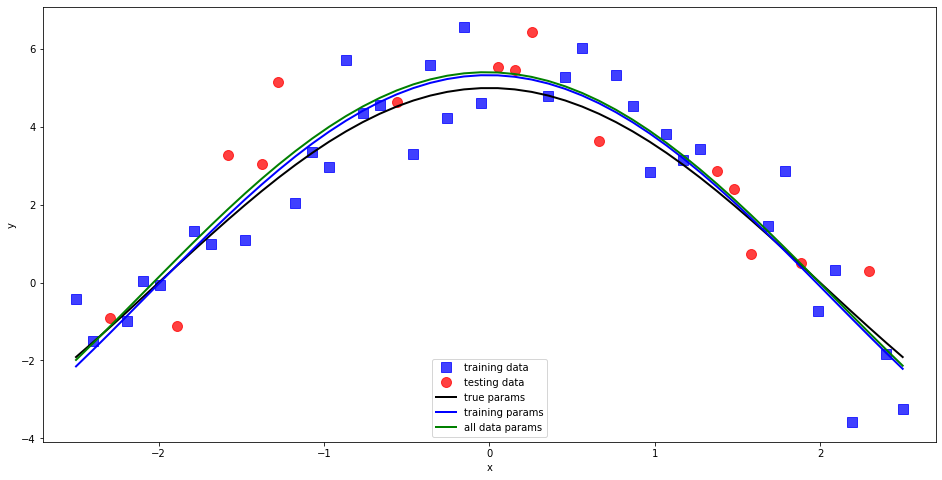

In [5]:
import model  # Local model.py

# Load data
filenames = ["dataN50.txt", "dataN500.txt", "dataN5000.txt"]
i = 0  # use 0, 1 or 2
data = model.load_data(datapath / filenames[i])
N = data.shape[0]
split = int(0.7 * N)   # Change here

# Permute the data
np.random.seed(23)   # Change here
data = np.random.permutation(data)

# Do the split
training_data = data[:split,:]
testing_data = data[split:,:]

# Train model excluding the holdout set
training_params = model.get_params(training_data)

# Test with the holdout set
prediction_error = model.get_error(training_params, testing_data)
print("Prediction error estimated on {:.5} ".format(prediction_error))

# Train model with all the data
all_data_params = model.get_params(data)

# Report
model.full_report(training_data, testing_data, training_params, all_data_params)

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

__Entrenando y testeando los modelos para los datos Abalone__

A continuación se entrega el código necesario para entrenar los distintos modelos y realizar una predicción. 
Se proveen ejemplos de utilización.

In [6]:
abalone_data = (
    abalone.assign(sex=lambda x: x["sex"].map({"M": 1, "I": 0, "F": -1}))
    .loc[lambda x: x.drop(columns="sex").gt(0).all(axis=1)]
    .astype(np.float)
)
abalone_data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,-1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


**Modelo A**

$$ \log(A) = \alpha_0 +  \alpha_1 W_1 + \alpha_2 W_2 +\alpha_3 W_3 +\alpha_4 W_4 + \alpha_5 S + \alpha_6 \log L + \alpha_7 \log D+  \alpha_8 \log H$$

In [7]:
def train_model_A(data):
    y = np.log(data.loc[:, "rings"].values.ravel())
    X = (
        data.assign(
            intercept=1.,
            length=lambda x: x["length"].apply(np.log),
            diameter=lambda x: x["diameter"].apply(np.log),
            height=lambda x: x["height"].apply(np.log),
        )
        .loc[: , ["intercept", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "sex", "length", "diameter", "height"]]
        .values
    )
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    return coeffs

def test_model_A(data, coeffs):
    X = (
        data.assign(
            intercept=1.,
            length=lambda x: x["length"].apply(np.log),
            diameter=lambda x: x["diameter"].apply(np.log),
            height=lambda x: x["height"].apply(np.log),
        )
        .loc[: , ["intercept", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "sex", "length", "diameter", "height"]]
        .values
    )
    ln_anillos = np.dot(X, coeffs)
    return np.exp(ln_anillos)

In [8]:
coeffs_A = train_model_A(abalone_data)
y_pred_A = test_model_A(abalone_data, coeffs_A)

df_A = pd.DataFrame({"y_real": abalone_data["rings"], "y_pred": y_pred_A})
df_A.head()

,y_real,y_pred
0,15.0,8.391625
1,7.0,7.050183
2,9.0,10.408104
3,10.0,9.171279
4,7.0,6.665040


In [27]:
chart_A = alt.Chart(df_A).mark_circle(opacity=0.5).encode(
    x="y_real",
    y="y_pred"
).properties(
    width=600,
    height=400,
    title="Valor predicho Modelo A vs valor real de anillos"
)

identity_line_A = (
    alt.Chart(
        pd.DataFrame({"y_real": [0, df_A.max().max() + 1], "y_pred": [0, df_A.max().max() + 1]})
    )
    .mark_line(color="red", opacity=0.5)
    .encode(
        x="y_real",
        y="y_pred"
    )
)

chart_A + identity_line_A

alt.LayerChart(...)

**Modelo B**

$$ \log(A) = \beta_0 + \beta_1 W_1 + \beta_2 W_2 +\beta_3 W_3 +\beta W_4 + \beta_5 \log( L  D H ) $$

In [10]:
def train_model_B(data):
    y = np.log(data.loc[:, "rings"].values.ravel())
    X = (
        data.assign(
            intercept=1.,
            ldh=lambda x: (x["length"] * x["diameter"] * x["height"]).apply(np.log),
        )
        .loc[: , ["intercept", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "ldh"]]
        .values
    )
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    return coeffs

def test_model_B(data, coeffs):
    X = (
        data.assign(
            intercept=1.,
            ldh=lambda x: (x["length"] * x["diameter"] * x["height"]).apply(np.log),
        )
        .loc[: , ["intercept", "whole_weight", "shucked_weight", "viscera_weight", "shell_weight", "ldh"]]
        .values
    )
    ln_anillos = np.dot(X, coeffs)
    return np.exp(ln_anillos)

In [11]:
coeffs_B = train_model_B(abalone_data)
y_pred_B = test_model_B(abalone_data, coeffs_B)

df_B = pd.DataFrame({"y_real": abalone_data["rings"], "y_pred": y_pred_B})
df_B.head()

,y_real,y_pred
0,15.0,8.286716
1,7.0,6.986724
2,9.0,10.456233
3,10.0,8.887692
4,7.0,6.613595


In [25]:
chart_B = alt.Chart(df_B).mark_circle(opacity=0.4).encode(
    x="y_real",
    y="y_pred"
).properties(
    width=600,
    height=400,
    title="Valor predicho Modelo B vs valor real de anillos"
)

identity_line_B = (
    alt.Chart(
        pd.DataFrame({"y_real": [0, df_B.max().max() + 1], "y_pred": [0, df_B.max().max() + 1]})
    )
    .mark_line(color="red", opacity=0.5)
    .encode(
        x="y_real",
        y="y_pred"
    )
)

chart_B + identity_line_B

alt.LayerChart(...)

**Modelo C**

Consideramos 12 parámetros, llamados $\theta_i^{k}$, con $k \in \{M, F, I\}$, para el siguiente modelo:

Si $S=male$:
$$ \log(A) = \theta_0^M + \theta_1^M W_2  + \theta_2^M W_4 + \theta_3^M \log( L  D H ) $$

Si $S=female$
$$ \log(A) = \theta_0^F + \theta_1^F W_2  + \theta_2^F W_4 + \theta_3^F \log( L  D H ) $$

Si $S=indefined$
$$ \log(A) = \theta_0^I + \theta_1^I W_2  + \theta_2^I W_4 + \theta_3^I \log( L  D H ) $$

In [13]:
def train_model_C(data):
    df = (
        data.assign(
            intercept=1.,
            ldh=lambda x: (x["length"] * x["diameter"] * x["height"]).apply(np.log),
        )
        .loc[: , ["intercept", "shucked_weight", "shell_weight", "ldh", "sex", "rings"]]
    )
    coeffs_dict = {}
    for sex, df_sex in df.groupby("sex"):
        X = df_sex.drop(columns=["sex", "rings"])
        y = np.log(df_sex["rings"].values.ravel())
        coeffs_dict[sex] = np.linalg.lstsq(X, y, rcond=None)[0]
    return coeffs_dict

def test_model_C(data, coeffs_dict):
    df = (
        data.assign(
            intercept=1.,
            ldh=lambda x: (x["length"] * x["diameter"] * x["height"]).apply(np.log),
        )
        .loc[: , ["intercept", "shucked_weight", "shell_weight", "ldh", "sex", "rings"]]
    )
    pred_dict = {}
    for sex, df_sex in df.groupby("sex"):
        X = df_sex.drop(columns=["sex", "rings"])
        ln_anillos = np.dot(X, coeffs_dict[sex])
        pred_dict[sex] = np.exp(ln_anillos)
    return pred_dict

In [14]:
coeffs_C = train_model_C(abalone_data)
y_pred_C = test_model_C(abalone_data, coeffs_C)

tmp_dict  = {}
for sex, df_tmp in abalone_data.groupby("sex"):
    tmp_dict[sex] = pd.DataFrame(
        {
            "y_real": df_tmp["rings"],
            "y_pred": y_pred_C[sex]
        }
    )
df_C = pd.concat(tmp_dict).reset_index().drop(columns=["level_1"]).rename(columns={"level_0": "sex"})
df_C.head()

,sex,y_real,y_pred
0,-1.0,9.0,10.695544
1,-1.0,20.0,13.259581
2,-1.0,16.0,11.077287
3,-1.0,19.0,12.330757
4,-1.0,14.0,11.209440


In [26]:
chart_C = alt.Chart(df_C).mark_circle(opacity=0.4).encode(
    x="y_real",
    y="y_pred",
    color="sex:N"
).properties(
    width=600,
    height=400,
    title="Valor predicho Modelo B vs valor real de anillos"
)

identity_line_C = (
    alt.Chart(
        pd.DataFrame({"y_real": [0, df_C.max().max() + 1], "y_pred": [0, df_C.max().max() + 1]})
    )
    .mark_line(color="red", opacity=0.5)
    .encode(
        x="y_real",
        y="y_pred"
    )
)

chart_C + identity_line_C

alt.LayerChart(...)

## Validación Cruzada

Aprender/ajustar los parámetros de una función de predicción y probarlo con los mismos datos es un error metodológico: un modelo que simplemente repita las etiquetas de las muestras que acaba de ver tendría una puntuación perfecta pero no podría predecir nada útil, en particular datos nuevos. Esta situación se llama **sobreajuste** (**_overfitting_**). Para evitarlo, una práctica común es cuando se realiza un experimento de aprendizaje automático (supervisado) mantener parte de los datos disponibles como un conjunto de pruebas `X_test`, `y_test`. Es importante tener en cuenta que la palabra _"experimento"_ no pretende denotar únicamente el uso académico, porque incluso en entornos comerciales, el aprendizaje automático generalmente comienza de manera experimental. Aquí hay un diagrama de flujo del flujo de trabajo típico de validación cruzada en la capacitación de modelos. Los mejores parámetros se pueden determinar mediante técnicas de búsqueda de cuadrícula (_grid search_).

<img alt="Validacion cruzada" title="Validacion cruzada" src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width=800>


De las técnicas de validación cruzada (_cross-validation_ o solo CV) el más sencillo es _k-fold_, la cual se inicia mediante el fraccionamiento de un conjunto de datos en un número $k$ de particiones (generalmente entre 5 y 10) llamadas _pliegues_ (_folds_). El proceso consiste en iterar entre los datos de evaluación y entrenamiento $k$ veces, de un modo particular. En cada iteración de la validación cruzada, un pliegue diferente se elige como los datos de evaluación. En esta iteración, los otros pliegues $k-1$ se combinan para formar los datos de entrenamiento. Por lo tanto, en cada iteración tenemos $(k-1) / k$ de los datos utilizados para el entrenamiento y $1 / k$ utilizado para la evaluación.

Cada iteración produce un modelo, y por lo tanto una estimación del rendimiento de la generalización, por ejemplo, una estimación de la precisión. Una vez finalizada la validación cruzada, todos los ejemplos se han utilizado sólo una vez para evaluar pero $k -1$ veces para entrenar. En este punto tenemos estimaciones de rendimiento de todos los pliegues y podemos calcular la media y la desviación estándar de la precisión del modelo.

<img alt="Validacion cruzada" title="Validacion cruzada" src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">

### Ejemplo con Iris Dataset

In [16]:
from sklearn import datasets 

iris = datasets.load_iris()
iris_df = (
    pd.DataFrame(iris.data, columns=iris.feature_names)
    .assign(
        target=iris.target,
        target_names=lambda x: x.target.map(dict(zip(range(3), iris.target_names)))
    )
)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Tal como la semana pasada utilizaremos un modelo de Regresión Logística. Un _k-fold_ con $k=1$ es lo mismo que dividir nuestros datos en _train_ y _set_ como se hace usualmente, lo cual no es muy sorprendente.

In [17]:
from sklearn.model_selection import train_test_split

X = iris_df.drop(columns=["target", "target_names"]).values
y = iris_df["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 

In [18]:
print(X_test)

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]]


En `scikit-learn` la función de K-fold conserva el orden de los datos y no se ve afectado por clases ni grupos.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0041.png)

Para permutaciones aleatorias existe [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit)

In [19]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)
i = 1
for train, test in kf.split(X, y):
    print(f"K-fold iteración {i}\n")
    print(f"Train indices:\n {train}\n")
    print(f"Test indices:\n {test}\n\n")
    i += 1

K-fold iteración 1

Train indices:
 [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]

Test indices:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


K-fold iteración 2

Train indices:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 

Para filtrar la data basta con usar los índices que retorna el método `split`.

In [20]:
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
print(X_test)

[[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]
 [7.6 3.  6.6 2.1]
 [4.9 2.5 4.5 1.7]
 [7.3 2.9 6.3 1.8]
 [6.7 2.5 5.8 1.8]
 [7.2 3.6 6.1 2.5]
 [6.5 3.2 5.1 2. ]
 [6.4 2.7 5.3 1.9]
 [6.8 3.  5.5 2.1]
 [5.7 2.5 5.  2. ]
 [5.8 2.8 5.1 2.4]
 [6.4 3.2 5.3 2.3]
 [6.5 3.  5.5 1.8]
 [7.7 3.8 6.7 2.2]
 [7.7 2.6 6.9 2.3]
 [6.  2.2 5.  1.5]
 [6.9 3.2 5.7 2.3]
 [5.6 2.8 4.9 2. ]
 [7.7 2.8 6.7 2. ]
 [6.3 2.7 4.9 1.8]
 [6.7 3.3 5.7 2.1]
 [7.2 3.2 6.  1.8]
 [6.2 2.8 4.8 1.8]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.1]
 [7.2 3.  5.8 1.6]
 [7.4 2.8 6.1 1.9]
 [7.9 3.8 6.4 2. ]
 [6.4 2.8 5.6 2.2]
 [6.3 2.8 5.1 1.5]
 [6.1 2.6 5.6 1.4]
 [7.7 3.  6.1 2.3]
 [6.3 3.4 5.6 2.4]
 [6.4 3.1 5.5 1.8]
 [6.  3.  4.8 1.8]
 [6.9 3.1 5.4 2.1]
 [6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]
 [5.8 2.7 5.1 1.9]
 [6.8 3.2 5.9 2.3]
 [6.7 3.3 5.7 2.5]
 [6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


Para balancear por clases se utiliza `K-fold Stratificado`, la representación gráfica lo dice todo.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0071.png)


In [21]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))

train -  [33 33 34]   |   test -  [17 17 16]
train -  [33 34 33]   |   test -  [17 16 17]
train -  [34 33 33]   |   test -  [16 17 17]


Algo como el método `value_counts()` de `pandas` sería lo siguiente:

In [22]:
np.array(np.unique(y[test], return_counts=True)).T

array([[ 0, 16],
       [ 1, 17],
       [ 2, 17]])

En cambio, si hacemos un k-fold común y corriente:

In [23]:
kf = KFold(n_splits=3)
for train, test in kf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))

train -  [ 0 50 50]   |   test -  [50]
train -  [50  0 50]   |   test -  [ 0 50]
train -  [50 50]   |   test -  [ 0  0 50]


In [24]:
np.array(np.unique(y[test], return_counts=True)).T

array([[ 2, 50]])

No tiene por qué estar balanceado! Y esto repercutirá a la hora del entrenamiento.

Más información y tipos de validación cruzada ya están implementado en `scikit-learn` en el siguiente [link](https://scikit-learn.org/stable/modules/cross_validation.html).

### Obteniendo scores

Cuando obtienes el error de test de un modelo este se encuentra condiconado por la forma en que se dividieron los conjuntos de train/test. Una forma de hacer más imparcial esta comparación es utilizando cross-validation con tal de tener más de un error de testeo.

In [33]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
kfolds = 5
skf = StratifiedKFold(n_splits=kfolds)
for i, (train, test) in enumerate(skf.split(X, y), start=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"La {i}-ésima iteración de nuestro k-fold tiene un score de {score}")
    

La 1-ésima iteración de nuestro k-fold tiene un score de 0.9666666666666667
La 2-ésima iteración de nuestro k-fold tiene un score de 0.9666666666666667
La 3-ésima iteración de nuestro k-fold tiene un score de 0.9333333333333333
La 4-ésima iteración de nuestro k-fold tiene un score de 0.9666666666666667
La 5-ésima iteración de nuestro k-fold tiene un score de 1.0


Sin embargo, `scikit-learn` posee herramientas para hacer la validación cruzada casi automáticamente. Si prestas atención, los ingredientes debiesen ser el _Estimator_, los datos y la forma de hacer la validación cruzada.

In [39]:
from sklearn.model_selection import cross_validate
knn = KNeighborsClassifier(n_neighbors=k)

cv = cross_validate(knn, X, y, cv=kfolds)
print(*cv["test_score"], sep="\n")

0.9666666666666667
0.9666666666666667
0.9333333333333333
0.9666666666666667
1.0


La próxima clase utilizaremos cross-validation para elegir el modelo que mejor se ajuste al conjunto de datos.

<a id='metrics'></a>